In [ ]:
%pip install numpy

In [1]:
%pip install matplotlib

  Using cached matplotlib-3.7.3-cp310-cp310-win_amd64.whl (7.5 MB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached contourpy-1.1.0-cp310-cp310-win_amd64.whl (470 kB)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Python310\python.exe -m pip install --upgrade pip' command.


Iteration: 100, Error: 0.4635
Iteration: 200, Error: 0.3351
Iteration: 300, Error: 0.3100
Iteration: 400, Error: 0.2922
Iteration: 500, Error: 0.2783
Iteration: 600, Error: 0.2683
Iteration: 700, Error: 0.2610
Iteration: 800, Error: 0.2550
Iteration: 900, Error: 0.2513
Iteration: 1000, Error: 0.2484


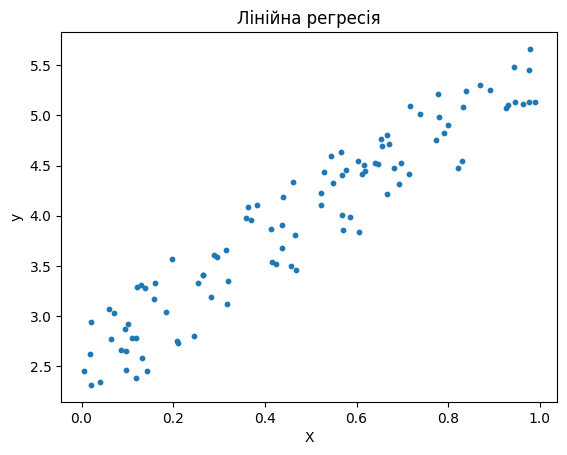

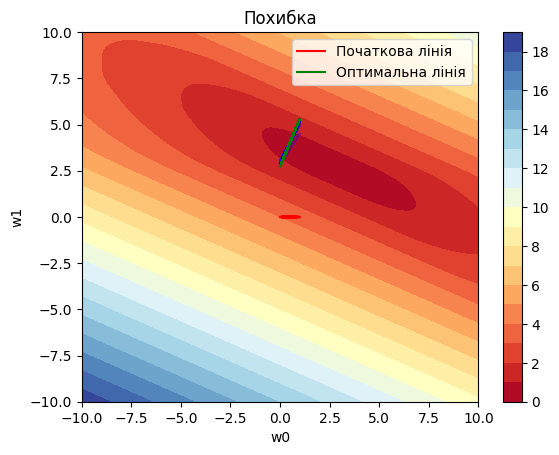

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Задаємо початкові дані
np.random.seed(0)
X = np.random.rand(100, 1)
y = 2 + 3 * X + np.random.rand(100, 1)

# Відображення точок на графіку
plt.scatter(X, y, s=10)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Лінійна регресія')

# Функція для обчислення похибки
def compute_error(y, y_pred):
    return np.mean(np.abs(y - y_pred))

# Початкові значення коефіцієнтів
w0 = np.linspace(-10, 10, 100)
w1 = np.linspace(-10, 10, 100)

# Матриця для збереження значень похибки
errors = np.zeros((len(w0), len(w1)))

# Пошук оптимальних значень коефіцієнтів
for i in range(len(w0)):
    for j in range(len(w1)):
        y_pred = w0[i] + w1[j] * X
        errors[i, j] = compute_error(y, y_pred)

# Відображення значень похибки
plt.figure()
plt.contourf(w0, w1, errors, levels=20, cmap='RdYlBu')
plt.colorbar()
plt.xlabel('w0')
plt.ylabel('w1')
plt.title('Похибка')

# Обчислення початкової лінії
w0_initial = 0
w1_initial = 0
y_pred_initial = w0_initial + w1_initial * X
error_initial = compute_error(y, y_pred_initial)

# Відображення початкової лінії
plt.plot(X, y_pred_initial, 'r', label='Початкова лінія')
plt.legend()

# Функція для градієнтного спуску
def gradient_descent(X, y, w0, w1, learning_rate, num_iterations, print_interval=None):
    n = len(X)
    for i in range(num_iterations):
        y_pred = w0 + w1 * X
        w0_gradient = -(2/n) * np.sum(y - y_pred)
        w1_gradient = -(2/n) * np.sum((y - y_pred) * X)
        w0 -= learning_rate * w0_gradient
        w1 -= learning_rate * w1_gradient
        # Функція для градієнтного спуску (продовження)
        if print_interval and (i + 1) % print_interval == 0:
            print(f'Iteration: {i+1}, Error: {compute_error(y, y_pred):.4f}')
            plt.plot(X, y_pred, 'b', alpha=0.3)

    return w0, w1

# Параметри градієнтного спуску
learning_rate = 0.01
num_iterations = 1000
print_interval = 100

# Запуск градієнтного спуску
w0_optimal, w1_optimal = gradient_descent(X, y, w0_initial, w1_initial, learning_rate, num_iterations, print_interval)

# Обчислення оптимальної лінії
y_pred_optimal = w0_optimal + w1_optimal * X
error_optimal = compute_error(y, y_pred_optimal)

# Відображення оптимальної лінії
plt.plot(X, y_pred_optimal, 'g', label='Оптимальна лінія')
plt.legend()

# Відображення графіка
plt.show()